In [2]:
# Importing required libraries
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras[tensorflow]
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from xgboost import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from tensorflow import keras
from scikeras.wrappers import KerasClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.6.9 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
orbax-checkpoint 0.2.1 requires jax>=0.4.8, but you have jax 0.3.25 which is incompatible.


Data Load

In [3]:
import glob
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_1 = pd.read_csv('/content/drive/My Drive/Breach/df_1.csv')

In [6]:
#df = pd.read_csv("/df_1.csv")
df_1.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


As the above dataset only has 350 records, I have searched one more similar dataset and will merge the common columns required.
Data breaches: Incidents in the world, that compromised more than 30000 records, between 2004 and 2017

In [7]:
#adding the name to unnmed column as index
df_1.drop( columns={'Unnamed: 0'}, inplace=True )

Exploratory Data Anlaysis

In [8]:

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             352 non-null    object
 1   Year               352 non-null    object
 2   Records            350 non-null    object
 3   Organization type  352 non-null    object
 4   Method             351 non-null    object
 5   Sources            350 non-null    object
dtypes: object(6)
memory usage: 16.6+ KB


In [9]:
#Data Decription
df_1.describe

<bound method NDFrame.describe of                                                 Entity  Year    Records  \
0                                21st Century Oncology  2016    2200000   
1                                                500px  2020   14870304   
2                                Accendo Insurance Co.  2020     175350   
3                           Adobe Systems Incorporated  2013  152000000   
4                                           Adobe Inc.  2019    7500000   
..                                                 ...   ...        ...   
347                                              Zynga  2019  173000000   
348  Unknown agency(believed to be tied to United S...  2020  200000000   
349  National Health Information Center (NCZI) of S...  2020     391250   
350           50 companies and government institutions  2022    6400000   
351                                               IKEA  2022      95000   

     Organization type                  Method      Sources  
0  

In [10]:
#number of rows and columns in the dataset
df_1.shape

(352, 6)

In [11]:
print(f'The  dataset has  {df_1.shape[1]} features. The list is : \n {df_1.columns.values.tolist()}')

The  dataset has  6 features. The list is : 
 ['Entity', 'Year', 'Records', 'Organization type', 'Method', 'Sources']


In [12]:
#number of unique values in different columns
df_1.nunique()

Entity               331
Year                  22
Records              255
Organization type     70
Method                25
Sources              312
dtype: int64

In [13]:
#Cehcking the different unique values for Year
for i in df_1['Year'].value_counts().index:
    print(i,df_1['Year'].value_counts()[i])

2011 34
2020 31
2019 30
2015 28
2013 28
2018 26
2014 25
2012 23
2016 22
2010 19
2008 16
2021 13
2009 13
2007 12
2017 9
2006 7
2005 6
2022 5
2004 2
2019-2020 1
2018-2019 1
2014 and 2015 1


In [14]:
df_2_2= pd.read_csv('/content/drive/My Drive/Breach/Data_Breaches_EN_V2_2004_2017_20180220.csv')

In [15]:
df_2_2.head()

,Entity,Alternative Name,Story,Year,Records Lost,Sector,Method of Leak,1st source,2nd source,3rd source,Source name,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,River City Media,Spam operator,A dodgy backup has allegedly resulted in over ...,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unique Identification Authority of India,Aadhaar data base,A report says that full data base has been exp...,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Spambot,NaN,A misconfigured spambot has leaked over 700m r...,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Friend Finder Network,Parent company of Adult Friend Finder,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Equifax,NaN,If you have a credit report,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(f'The  dataset has  {df_2_2.shape[1]} features. The list is : \n {df_2_2.columns.values.tolist()}')

The  dataset has  19 features. The list is : 
 ['Entity', 'Alternative Name', 'Story', 'Year', 'Records Lost', 'Sector', 'Method of Leak', '1st source', '2nd source', '3rd source', 'Source name', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']


In [17]:
df_2_2.shape

(999, 19)

In [18]:
df_2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            274 non-null    object 
 1   Alternative Name  120 non-null    object 
 2   Story             228 non-null    object 
 3   Year              275 non-null    float64
 4   Records Lost      93 non-null     object 
 5   Sector            80 non-null     object 
 6   Method of Leak    77 non-null     object 
 7   1st source        77 non-null     object 
 8   2nd source        12 non-null     object 
 9   3rd source        0 non-null      float64
 10  Source name       74 non-null     object 
 11  Unnamed: 11       4 non-null      object 
 12  Unnamed: 12       3 non-null      object 
 13  Unnamed: 13       3 non-null      object 
 14  Unnamed: 14       3 non-null      object 
 15  Unnamed: 15       2 non-null      object 
 16  Unnamed: 16       1 non-null      float64
 1

We can note that some of the values are in range instead the year itself like
2019-2020
2018-2019
2014 and 2015

Data cleaning is required to handle such type of uncleaned data

In [19]:
df_2=df_2_2[['Entity','Year','Records Lost','Sector', 'Method of Leak', '1st source']].copy()

In [20]:
df_2.rename(columns={"Records Lost":"Records","Sector": "Organization type" , "Method of Leak":"Method" ,"1st source":"Sources"}, errors="raise", inplace=True)

In [21]:
df_2.dropna(how='all',inplace=True)
df_2.fillna(method='bfill',inplace=True)

In [22]:
frames = [df_1, df_2]

df = pd.concat(frames,ignore_index=True)

In [23]:
df.head()

,Entity,Year,Records,Organization type,Method,Sources
0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,500px,2020,14870304,social networking,hacked,[7]
2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [24]:
#Cehcking the different unique values for Year
for i in df['Year'].value_counts().index:
    print(i,df['Year'].value_counts()[i])

2016.0 42
2011.0 35
2011 34
2013.0 31
2020 31
2019 30
2014.0 30
2013 28
2012.0 28
2015 28
2018 26
2014 25
2012 23
2008.0 23
2016 22
2010.0 20
2010 19
2015.0 17
2008 16
2007.0 14
2017.0 14
2009 13
2021 13
2007 12
2009.0 11
2017 9
2006 7
2006.0 6
2005 6
2022 5
2005.0 4
2004.0 2
2004 2
2014 and 2015 1
2018-2019 1
2019-2020 1


**Data Preprocessing**

In [25]:
#Changing year to interger
df['Year'] = df['Year'].astype(str)

df['Year'] = df['Year'].str[:4] #only using first 4 lettes of the year
df['Year'] = df['Year'].astype(int)

Now, we can visualize the counts of data breaches per year

To get the better understanding of the data, we tried to visualize the data with different parameters

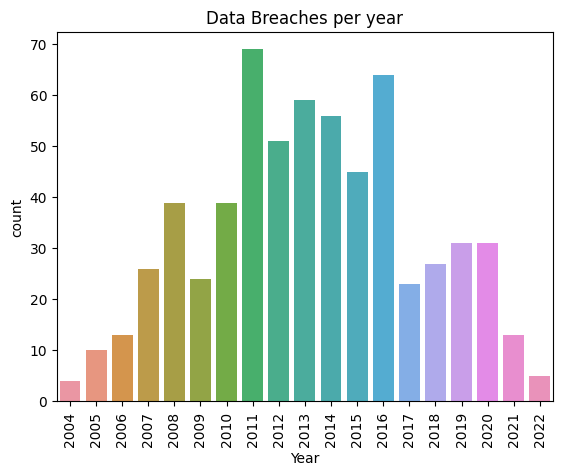

In [26]:
sns.countplot(x='Year', data=df);
plt.title('Data Breaches per year')
plt.xticks(rotation=90);

Handling the missing values

In [27]:
# Finding the number of missing values in different features of the dataset
print("Feature \t Number of missing values\n", df.isnull().sum())

Feature 	 Number of missing values
 Entity               0
Year                 0
Records              2
Organization type    2
Method               3
Sources              4
dtype: int64


As Records, Method, Sources has missing values, it might impact the 
optimal model of the data and can produce biased results.
In order to produce unbiased results, we now will apply different techniques to handle the missing values

Dropping rows with missing values in Records as the without the count of the breached data, the data is not useful

In [28]:
# Drop rows that has unknown values on selected columns
#df = df[df.Records != 'unknown']
#df[pd.to_numeric(df['Records'], errors='coerce').notnull()]
#df.dropna(subset=['Records'],inplace=True)
#df['Records'] = df['Records'].astype(int)


df['Records'] = pd.to_numeric(df['Records'], errors='coerce')
df = df.dropna(subset=['Records'])

Filling 'Method', 'Organization type' and 'Sources' with 'unknown' in the missing field

In [29]:

df["Method"].fillna("unknown", inplace = True)

df["Sources"].fillna("unknown", inplace = True)
df["Organization type"].fillna("unknown", inplace = True)

In [30]:
#Data Visualization
fig =px.sunburst(df, path=["Organization type","Entity"], values='Records', width = 700, height = 700, title = "Affected Company for each Sector")

fig.show()

Encoding the categorical columns to classes to prepare to feed in the model

As this is an multiclass prediction problem, the data should have atleast 5 rows of one class. So we will combine the less number of categories under one category for example: filter the labels less than 5 and label them as one single category like "others" or any name then the least populated class error will be solved.

In [31]:
pd.value_counts(df['Method'].values, sort=True)


hacked                                                  159
Hacked                                                  157
Lost / stolen device or media                            44
poor security                                            39
lost / stolen media                                      32
Inside job                                               31
Poor security                                            23
inside job                                               18
accidentally published                                   18
lost / stolen computer                                   15
Accidentally published                                   10
unknown                                                   8
poor security/inside job                                  2
improper setting, hacked                                  2
inside job, hacked                                        1
social engineering                                        1
accidentally exposed                    

In [32]:
other_classes = df['Method'].value_counts()[df['Method'].value_counts() < 5].index

df['Method'][df['Method'].isin(other_classes)] = 'unknown'

<ipython-input-32-671ce72a3448>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
#Sources
pd.value_counts(df['Sources'].values, sort=True)
other_classes = df['Sources'].value_counts()[df['Sources'].value_counts() < 5].index
df['Sources'][df['Sources'].isin(other_classes)] = 'unknown'

<ipython-input-33-5ba2487873f6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
fig = px.pie(df, values ="Records", names ="Organization type", title='Breaches by Sector')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [35]:
#LabelEncoder object
object_cols = df.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()

# Transform the categorical features into classes
df['Entity'] = encoder.fit_transform(df['Entity'])
df['Organization type'] = encoder.fit_transform(df['Organization type'])
df['Method'] = encoder.fit_transform(df['Method'])
df['Sources'] = encoder.fit_transform(df['Sources'])

In [36]:
df.head()

,Entity,Year,Records,Organization type,Method,Sources
0,2,2016,2200000.0,36,6,19
1,4,2020,14870304.0,58,6,19
2,7,2020,175350.0,36,10,19
3,10,2013,152000000.0,60,6,19
4,9,2019,7500000.0,60,10,19


array([[<Axes: title={'center': 'Entity'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Records'}>,
        <Axes: title={'center': 'Organization type'}>],
       [<Axes: title={'center': 'Method'}>,
        <Axes: title={'center': 'Sources'}>]], dtype=object)

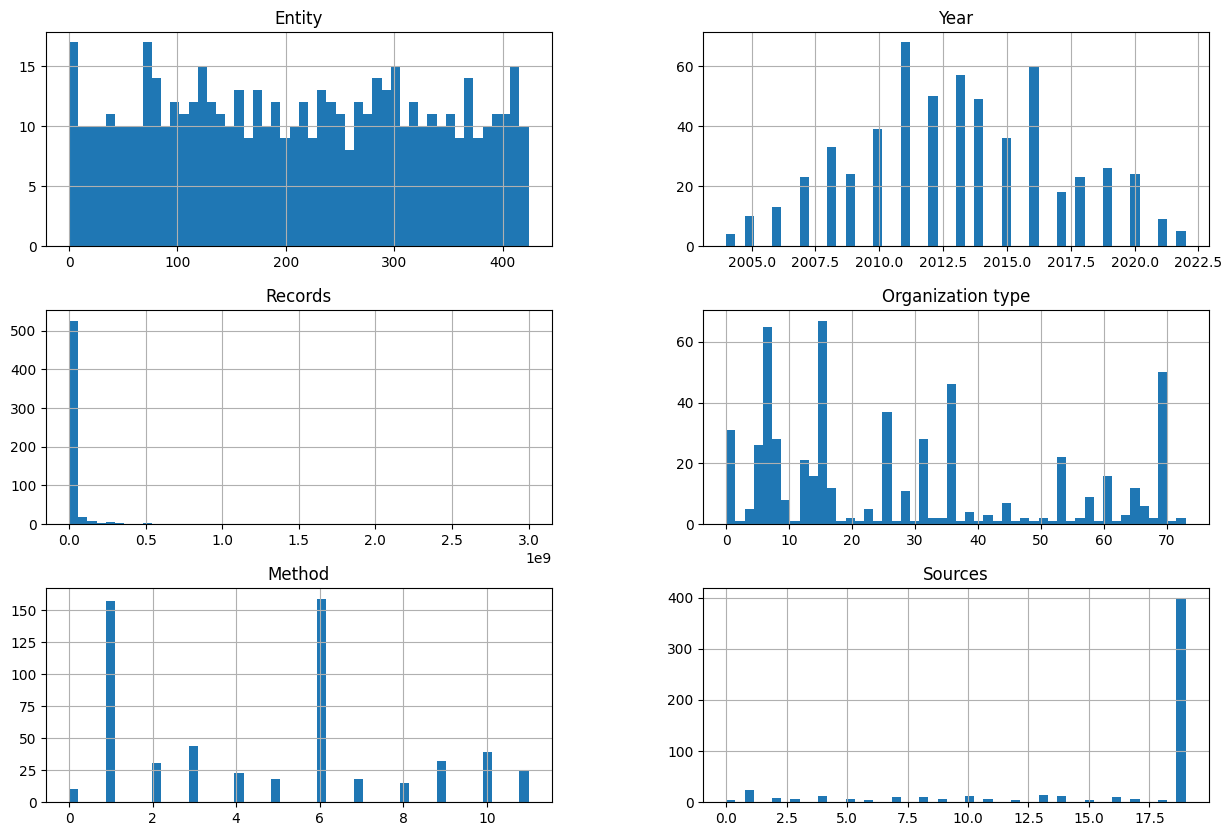

In [37]:
#Histogram to check data distribution
df.hist(bins = 50, figsize = (15,10))

After cleaning the data, we are checking for the outliers in the fetaures

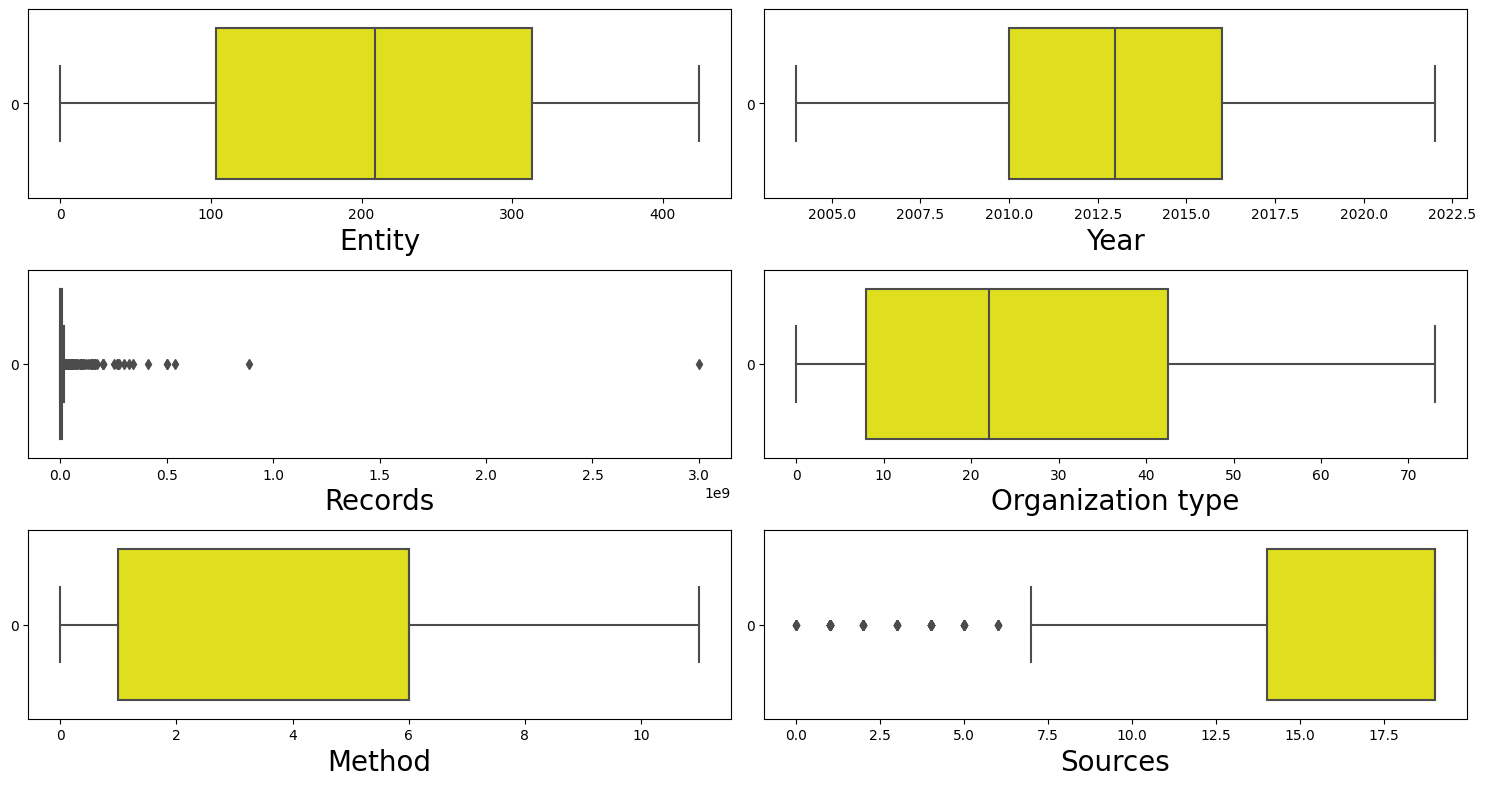

In [38]:
#outlier detection
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df[column],color='yellow',orient="h")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Sources', ylabel='Density'>

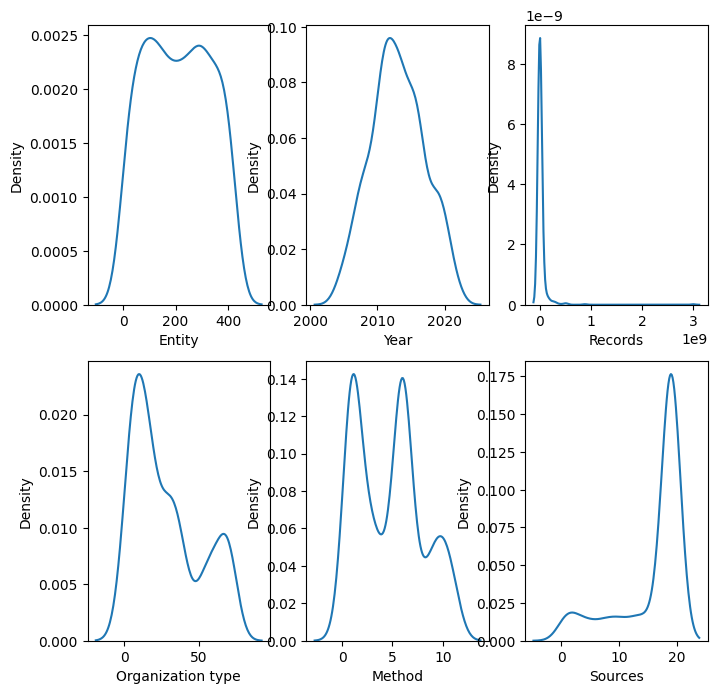

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))

sns.kdeplot(df['Entity'], ax=axes[0][0])

sns.kdeplot(df['Year'], ax=axes[0][1])

sns.kdeplot(df['Records'], ax=axes[0][2])

sns.kdeplot(df['Organization type'], ax=axes[1][0])

sns.kdeplot(df['Method'], ax=axes[1][1])

sns.kdeplot(df['Sources'], ax=axes[1][2])


As per the above graph, we can observe, the records columns has different count of the leaked data so it won't impact the model. The Method has few outliers which we will remove in next steps.

In [40]:
from scipy import stats
q1, q3 = stats.scoreatpercentile(df['Method'], [25, 75])
iqr = q3 - q1
indices = (df['Method'] < (q1 - 1.5 * iqr)) | (df['Method'] > (q3 + 1.5 * iqr))

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df = df[(df['Method'] >= lower_bound) & (df['Method'] <= upper_bound)]

A heat map to understand the correlation among the variables

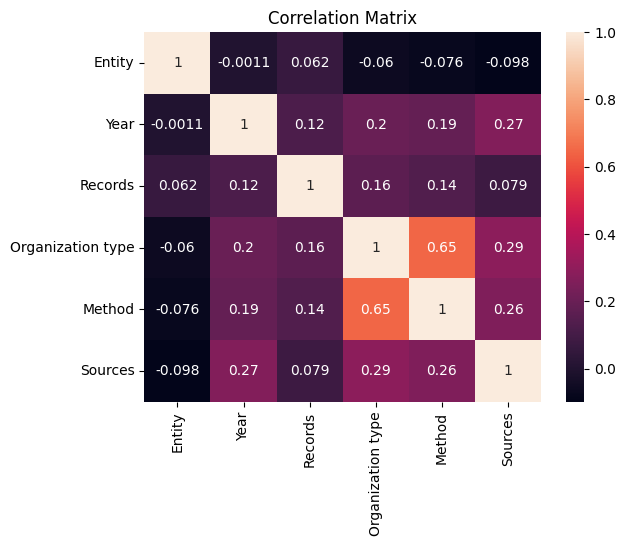

In [41]:
# Generate the correlation matrix
corr = df.corr()

# Generate the heat map
sns.heatmap(corr, annot=True)

# Set the plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

Problem  1: Predicting the Method of the breach on the organization

Split the dataset into training and testing sets

In [42]:
# split into 80:20 ratio
# separate the independent and dependent variables
X = df.drop('Method', axis=1)
y = df['Method']
# standardization of dependent variables
scaled_data = scale.fit_transform(X) 
print(scaled_data)
print(X.shape), print(y.shape), 
print()


[[-1.691092    0.74685201 -0.16411621  0.35163994  0.56155266]
 [-1.67481629  1.75441845 -0.0751244   1.33830534  0.56155266]
 [-1.65040272  1.75441845 -0.17833665  0.35163994  0.56155266]
 ...
 [-1.56088631 -2.0239557  -0.17816351 -1.03866129  0.56155266]
 [-1.43881848 -2.27584731 -0.17956818  1.78678961  0.56155266]
 [-1.66667843 -2.27584731 -0.17956818  1.78678961  0.56155266]]
(571, 5)
(571,)



In [43]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(train_X.shape), 
print(test_X.shape),
print(train_y.shape),
print(test_y.shape)

(456, 5)
(115, 5)
(456,)
(115,)


Data Modelling

CNN

In [44]:
from typing import Dict, Iterable, Any


def get_clf_model(hidden_layer_sizes: Iterable[int], meta: Dict[str, Any], compile_kwargs: Dict[str, Any]):
    model = keras.Sequential()
    inp = keras.layers.Input(shape=(meta["n_features_in_"]))
    model.add(inp)
    for hidden_layer_size in hidden_layer_sizes:
        layer = keras.layers.Dense(hidden_layer_size, activation="relu")
        model.add(layer)
    if meta["target_type_"] == "binary":
        n_output_units = 1
        output_activation = "sigmoid"
        loss = "binary_crossentropy"
    elif meta["target_type_"] == "multiclass":
        n_output_units = meta["n_classes_"]
        output_activation = "softmax"
        loss = "sparse_categorical_crossentropy"
    else:
        raise NotImplementedError(f"Unsupported task type: {meta['target_type_']}")
    out = keras.layers.Dense(n_output_units, activation=output_activation)
    model.add(out)
    model.compile(loss=loss, optimizer=compile_kwargs["optimizer"])
    return model



In [45]:
clf = KerasClassifier(
    model=get_clf_model,
    hidden_layer_sizes=(100, ),
    optimizer="adam",
    optimizer__learning_rate=0.001,
    verbose=0,
    random_state=0,
)

In [46]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(estimator=clf, random_state=0)
adaboost.fit(train_X, train_y)

AdaBoostClassifier(estimator=KerasClassifier(hidden_layer_sizes=(100,), model=<function get_clf_model at 0x7fb3ef8e2710>, optimizer='adam', optimizer__learning_rate=0.001, random_state=0, verbose=0),
                   random_state=0)

In [47]:
y_pred_ad = adaboost.predict(test_X)
accuracy_ad= accuracy_score(test_y, y_pred_ad)
precision_ad = precision_score(test_y, y_pred_ad,average='micro')
recall_ad = recall_score(test_y, y_pred_ad,average='micro')
f1_ad= f1_score(test_y, y_pred_ad,average='weighted')
print("Accuracy: {:.4f}".format(accuracy_ad))
print("Precision: {:.4f}".format(precision_ad))
print("Recall: {:.4f}".format(recall_ad))
print("F1 Score: {:.4f}".format(f1_ad))

Accuracy: 0.2348
Precision: 0.2348
Recall: 0.2348
F1 Score: 0.1198


In [48]:
single_score = clf.fit(train_X, train_y).score(train_X, train_y)

adaboost_score = adaboost.fit(train_X, train_y).score(train_X, train_y)

In [49]:
print(single_score)
print(adaboost_score)


0.27850877192982454
0.2412280701754386


Random Forest

In [50]:
class RandomForest:
  def __init__(self, n_estimators=1000):
    self.n_estimators = n_estimators
  
  def fit(self, train_x, train_y):
    self.model = RandomForestClassifier(n_estimators = self.n_estimators, random_state = 42)
    self.model.fit(train_X, train_y)
    return self.model
  
  def predict(self, test_X):
    pred = self.model.predict(test_X)
    return pred
  def predict_prob(self, test_X):
    prob = self.model.predict_proba(test_X)
    return prob
    
  def evaluate(self, test_X, test_y):
    pred = self.model.predict(test_X)
    self.errors = abs(pred - test_y)
    self.average_error = round(np.mean(self.errors), 2)
    return self.average_error


  def calculate_feature_importance(self, feature_names):
        importances = self.model.feature_importances_
        indices = np.argsort(importances)[::-1]
        sorted_feature_names = [feature_names[i] for i in indices]

        plt.figure(figsize=(10, 6))
        plt.title("Feature Importances")
        plt.bar(range(len(importances)), importances[indices], align="center")
        plt.xticks(range(len(importances)), sorted_feature_names, rotation='vertical')
        plt.xlabel("Features")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()

In [68]:
rf = RandomForest(n_estimators=1000)
rf.fit(train_X, train_y)
print('Mean Absolute Error:', rf.evaluate(test_X, test_y), 'degrees.')
prob_rf = rf.predict_prob(test_X)
y_pred_rf=rf.predict(test_X)
accuracy_rf= accuracy_score(test_y, y_pred_rf)
precision_rf = precision_score(test_y, y_pred_rf,average='micro')
recall_rf = recall_score(test_y, y_pred_rf,average='micro')
f1_rf= f1_score(test_y, y_pred_rf,average='weighted')
print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1 Score: {:.4f}".format(f1_rf))

Mean Absolute Error: 0.74 degrees.
Accuracy: 0.6957
Precision: 0.6957
Recall: 0.6957
F1 Score: 0.6522


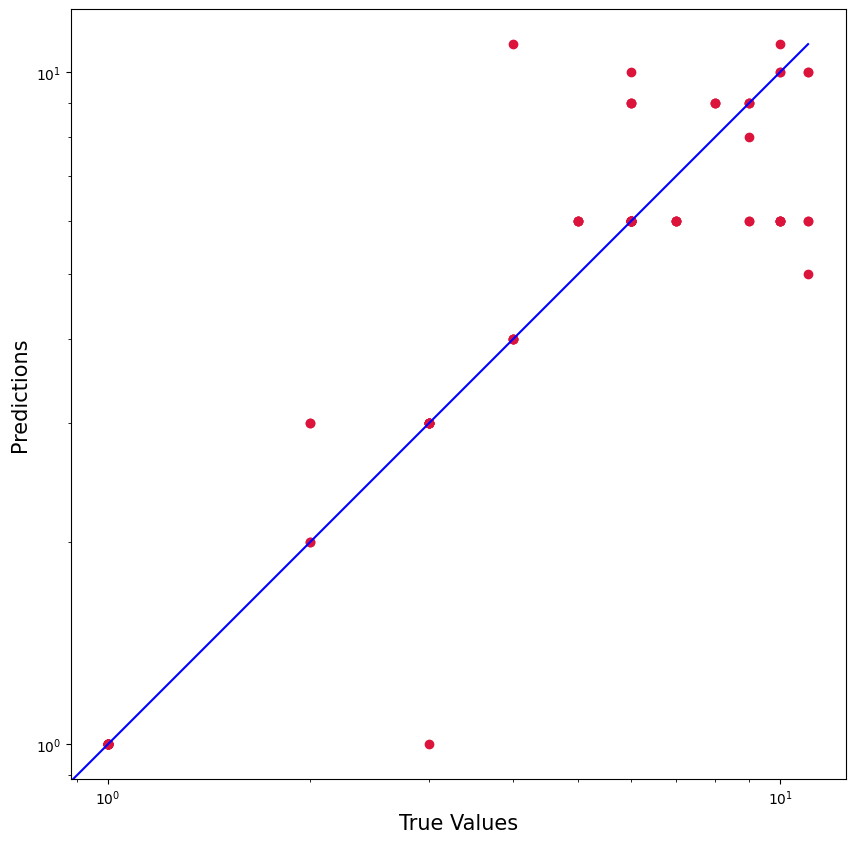

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(test_y, y_pred_rf, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_rf), max(test_y))
p2 = min(min(y_pred_rf), min(test_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

AUC-ROC Score: 0.8795


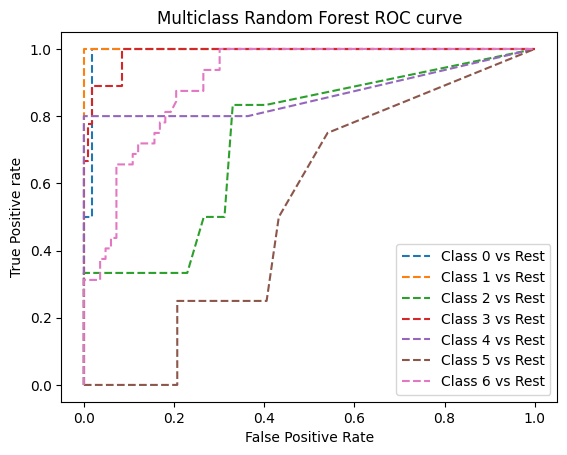

In [52]:
auc_rf= roc_auc_score(test_y, prob_rf,average='weighted',multi_class="ovo")
print("AUC-ROC Score: {:.4f}".format(auc_rf))
from scipy.sparse import random
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, prob_rf[:,i], pos_label=i)
    
# plotting 
for i in range(0,n_class):
  plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')
plt.title('Multiclass Random Forest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

Logistic Regression

In [53]:
LinearRegression = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LinearRegression.fit(train_X, train_y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(multi_class='multinomial')

In [54]:
y_pred_lr = LinearRegression.predict(test_X)
accuracy_lr= accuracy_score(test_y, y_pred_lr)
precision_lr = precision_score(test_y, y_pred_lr,average='micro')
recall_lr = recall_score(test_y, y_pred_lr,average='micro')
f1_lr= f1_score(test_y, y_pred_lr,average='weighted')
prob_lr = LinearRegression.predict_proba(test_X)
p_pred_lr = y_pred_lr.flatten()
auc_lr= roc_auc_score(test_y, prob_lr,average='weighted',multi_class="ovo")
print("Accuracy: {:.4f}".format(accuracy_lr))
print("Precision: {:.4f}".format(precision_lr))
print("Recall: {:.4f}".format(recall_lr))
print("F1 Score: {:.4f}".format(f1_lr))
print("AUC-ROC Score: {:.4f}".format(auc_lr))
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(LinearRegression, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.3391
Precision: 0.3391
Recall: 0.3391
F1 Score: 0.2208
AUC-ROC Score: 0.5507
Mean Accuracy: 0.313 (0.048)


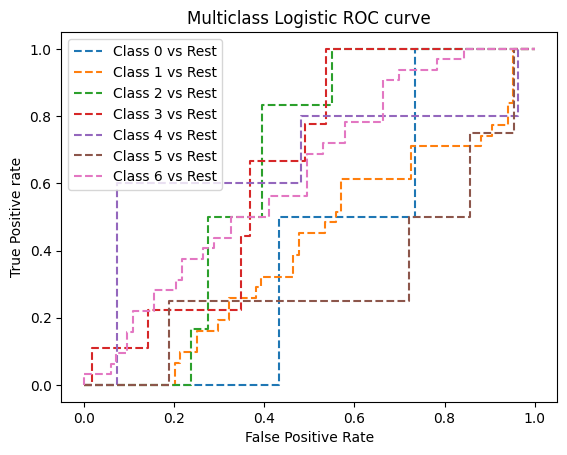

In [55]:
from scipy.sparse import random
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, prob_lr[:,i], pos_label=i)
    
# plotting 
for i in range(0,n_class):
  plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')
plt.title('Multiclass Logistic ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

Gaussian

In [56]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(train_X, train_y)

GaussianNB()

In [57]:
y_pred_gb = GaussianNB_model.predict(test_X)
accuracy_gb=GaussianNB_model.score(test_X, test_y)
print('Accuracy of GaussianNB_model model is: ', accuracy_gb)
precision_gb = precision_score(test_y, y_pred_gb,average='micro')
recall_gb = recall_score(test_y, y_pred_gb,average='micro')
f1_gb= f1_score(test_y, y_pred_gb,average='weighted')
prob_gb= GaussianNB_model.predict_proba(test_X)
p_pred_gb = y_pred_gb.flatten()
auc_gb= roc_auc_score(test_y, prob_gb,average='weighted',multi_class="ovo")
print("Precision: {:.4f}".format(precision_gb))
print("Recall: {:.4f}".format(recall_gb))
print("F1 Score: {:.4f}".format(f1_gb))
print("AUC-ROC Score: {:.4f}".format(auc_gb))

Accuracy of GaussianNB_model model is:  0.3217391304347826
Precision: 0.3217
Recall: 0.3217
F1 Score: 0.2021
AUC-ROC Score: 0.5861


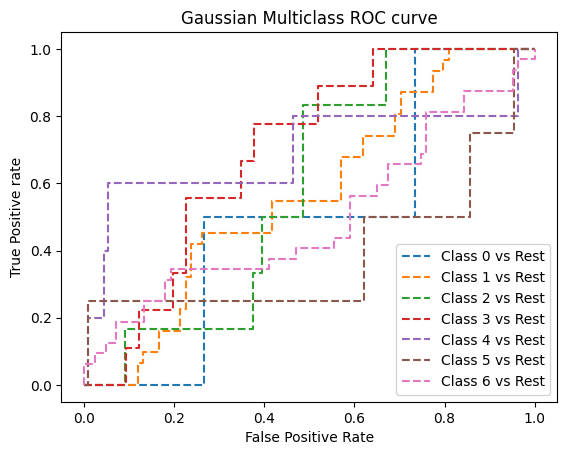

In [58]:
from scipy.sparse import random
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, prob_gb[:,i], pos_label=i)
    
# plotting 
for i in range(0,n_class):
  plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')
plt.title('Gaussian Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

KNN

In [59]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_X, train_y)


KNeighborsClassifier()

In [60]:
y_pred_knn= knn_model.predict(test_X)
precision_knn = precision_score(test_y, y_pred_knn,average='micro')
recall_knn = recall_score(test_y, y_pred_knn,average='micro')
f1_knn= f1_score(test_y, y_pred_knn,average='weighted')
prob_knn = knn_model.predict_proba(test_X)
p_pred_knn = y_pred_knn.flatten()
auc_knn= roc_auc_score(test_y, prob_knn,average='weighted',multi_class="ovo")
accuracy_knn=knn_model.score(test_X, test_y)
print('Accuracy of KNN model is: ',accuracy_knn )
print("Precision: {:.4f}".format(precision_knn))
print("Recall: {:.4f}".format(recall_knn))
print("F1 Score: {:.4f}".format(f1_knn))
print("AUC-ROC Score: {:.4f}".format(auc_knn))

Accuracy of KNN model is:  0.41739130434782606
Precision: 0.4174
Recall: 0.4174
F1 Score: 0.3655
AUC-ROC Score: 0.6804


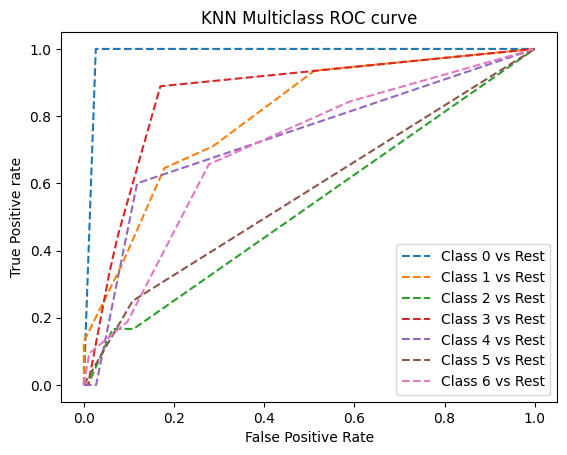

In [61]:
from scipy.sparse import random
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, prob_knn[:,i], pos_label=i)
    
# plotting 
for i in range(0,n_class):
  plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')
plt.title('KNN Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

SVM

In [62]:
svm_model = SVC(kernel='rbf', C=1, random_state=0,probability=True)
svm_model.fit(train_X, train_y)

SVC(C=1, probability=True, random_state=0)

In [63]:
y_pred_sv = svm_model.predict(test_X)
precision_sv = precision_score(test_y, y_pred_sv,average='micro')
recall_sv = recall_score(test_y, y_pred_sv,average='micro')
f1_sv= f1_score(test_y, y_pred_sv,average='weighted')
prob_sv= svm_model.predict_proba(test_X)
p_pred_sv = y_pred_sv.flatten()
auc_sv= roc_auc_score(test_y, prob_sv,average='weighted',multi_class="ovo")
accuracy_sv=svm_model.score(test_X, test_y)
print('Accuracy of SVC model is: ', accuracy_sv)
print("Precision: {:.4f}".format(precision_sv))
print("Recall: {:.4f}".format(recall_sv))
print("F1 Score: {:.4f}".format(f1_sv))
print("AUC-ROC Score: {:.4f}".format(auc_sv))

Accuracy of SVC model is:  0.3391304347826087
Precision: 0.3391
Recall: 0.3391
F1 Score: 0.2285
AUC-ROC Score: 0.6060


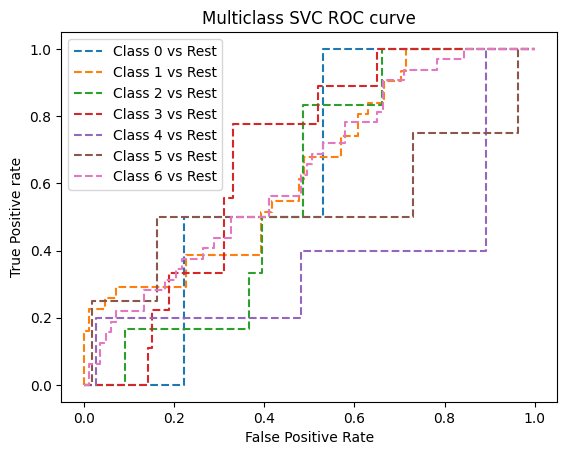

In [64]:
from scipy.sparse import random
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, prob_sv[:,i], pos_label=i)
    
# plotting 
for i in range(0,n_class):
  plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')
plt.title('Multiclass SVC ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

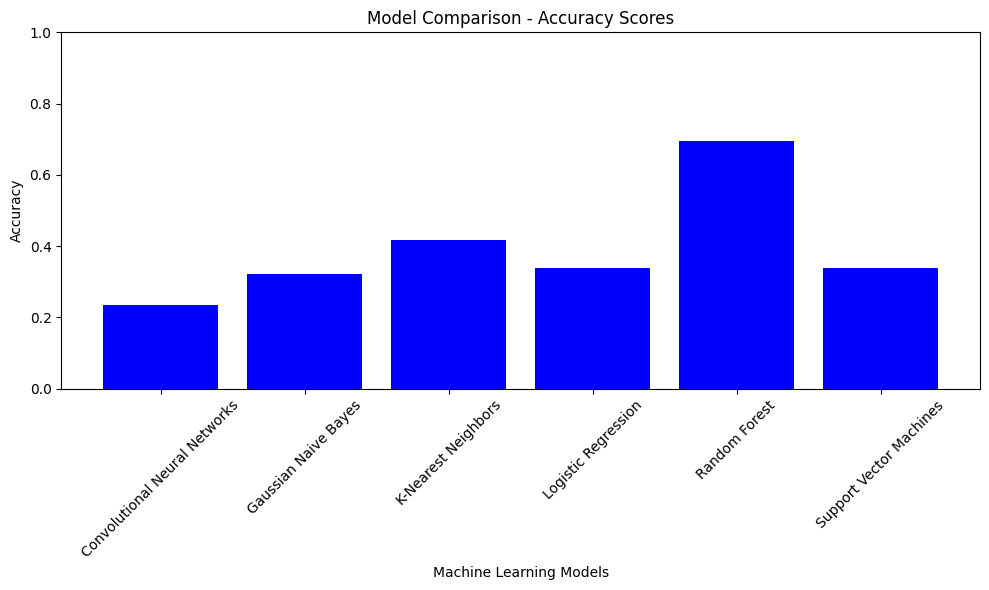

In [65]:

# Accuracy scores of each model
models = [ 'Convolutional Neural Networks', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Logistic Regression','Random Forest', 'Support Vector Machines' ]
accuracy_scores = [accuracy_ad, accuracy_gb, accuracy_knn,accuracy_lr,accuracy_rf,accuracy_sv]

# Plotting the model comparison accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='blue')

plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy Scores')

plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Feature Importance


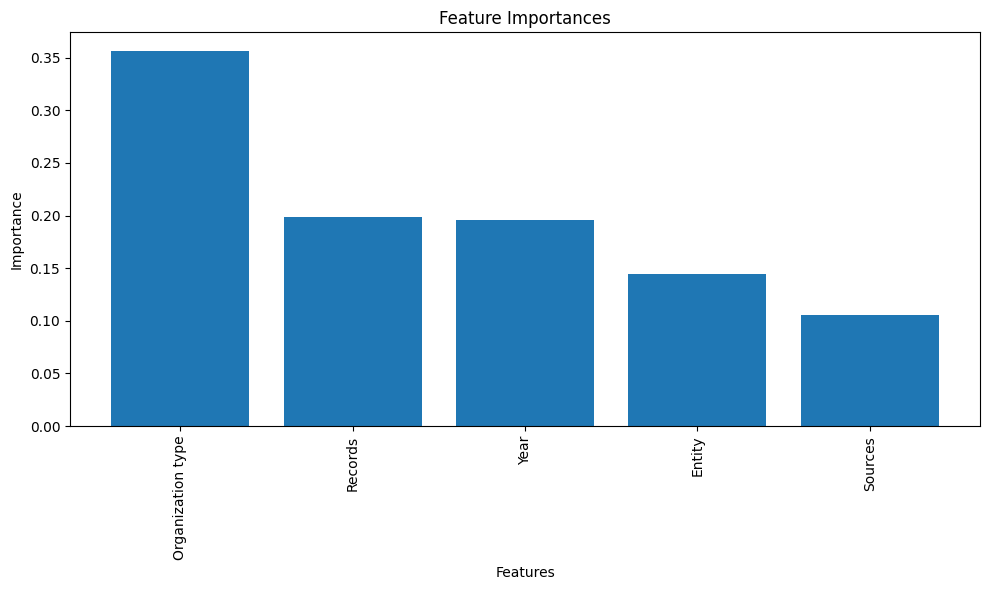

In [66]:

# Using the random forest classifier (rf)

# Get feature importances
# Get the feature names from the original dataset
feature_names = train_X.columns

# Calculate and plot feature importance
rf.calculate_feature_importance(feature_names)


In [67]:
from sklearn.tree import export_graphviz
from IPython import display

str_tree = export_graphviz(rf, 
   out_file=None, 
   feature_names=train_X.columns, # column names
   filled=True,        
   special_characters=True, 
   rotate=True, 
   precision=0.6)

display.display(str_tree)

NotFittedError: ignored